In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [3]:
make_regression

<function sklearn.datasets.samples_generator.make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)>

In [12]:
n_samples=100
n_features=6
n_informative=3  ##number of features which create impact

In [13]:
X, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                       random_state=None, shuffle=False,noise=20,coef=True)

In [14]:
df1 = pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,-1.281109,0.993148,1.366800,-0.356803,0.168237,0.052661,89.788019
1,-0.207338,-0.919710,-0.642328,-0.584108,0.988512,0.313223,-64.181419
2,-0.782923,0.395382,0.266205,1.197251,-0.807189,1.082074,16.739855
3,-0.550071,0.602770,0.466315,-0.119904,1.301265,1.103736,72.583063
4,0.454617,-0.004312,1.696612,0.037161,0.579574,1.335534,143.033364
5,-0.452999,1.327192,-0.453387,-0.758962,-0.864646,0.499903,11.776926
6,-1.163023,1.173077,-0.186156,0.538924,-1.393265,-0.317886,12.562676
7,-0.739787,0.954446,-0.233732,-0.067609,0.302844,1.129508,-27.044676
8,0.505565,-0.478507,-0.563205,0.258818,3.905243,0.194760,-33.723081
9,-0.431044,-0.391637,0.629764,0.246015,1.964799,-0.637464,6.674853


In [15]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz, ExtraTreeClassifier

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
from sklearn import tree


In [50]:
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Relative importance of the features:  [0.01994889 0.20248057 0.73460265 0.00146105 0.00879545 0.03271139]


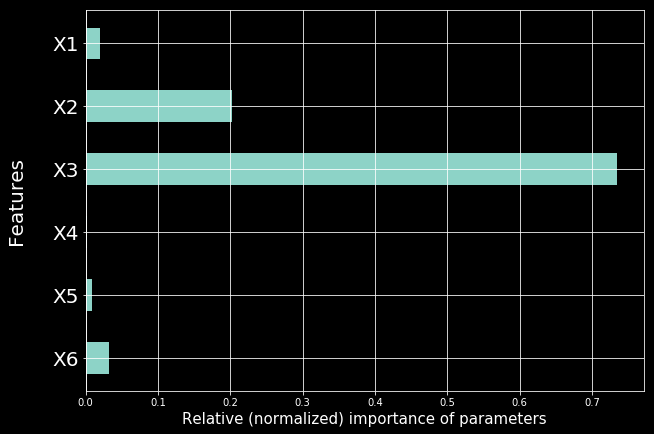

In [57]:
print("Relative importance of the features: ",tree_model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=tree_model.feature_importances_,height=0.5)

In [51]:
print("Regression coefficient:",tree_model.score(X,y)) ###decision tree

Regression coefficient: 0.9668885014456812


In [ ]:
####random forest


In [54]:
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(X, y)

C:\Users\aa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=5,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Relative importance of the features:  [0.00461142 0.16880244 0.821904   0.00162478 0.         0.00305736]


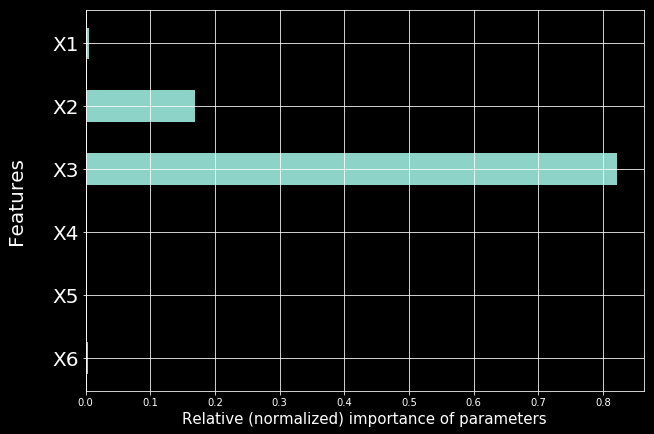

In [55]:
print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

In [56]:
print("Regression coefficient:",model.score(X,y))

Regression coefficient: 0.8447558161852907


In [ ]:
####linear regression


In [58]:
from sklearn.linear_model import LinearRegression

In [60]:
regressor=LinearRegression()

In [62]:
w=df[['X1','X2','X3','X4','X5','X6']]

In [64]:
z=df[['y']]

In [73]:
x_train,x_test,y_train,y_test=train_test_split(w,z,test_size=0.2,random_state=0)

In [74]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
regressor.score(x,y)

0.9395805780871642